### **PROBLEM** **STATEMENT** 

To implement a basic k means clustering algorithm, ideally as a set of functions. Run it on any dataset and provide a simple visualization of its results. Please write code in Python on a Jupyter notebook.


### **K**-**Means** **Algorithm** **from** **Scratch** **in** **Python**


k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

**Steps** **involved** **in** **K** **means** **clustering** **algorithm** **are** **as** **follows** :

- Set values of 'K' according to what you feel is appropriate.
- Choose at random 'K' data points as "centroids"
- For each datapoint 'e' in the dataset, measure the euclidean distance to the centroid and assign it to the nearest centroid.
- Recalculate the centroids as the mean of each cluster
- Reassign data points to new centroids
- If centroids no longer change, stop the reassignment as the convergence has been attained.



**DATASET** **CHOSEN** : **CUSTOMER** **SEGMENTATION** **DATASET** (**Malls_Customers**)

This dataset contains information about people visiting the mall and has the following attributes : 

1. Customer ID
2. Gender
3. Age
4. Annual Income (k$)
5. Spending Score (1-100)



**WHAT** **IS** **CUSTOMER** **SEGMENTATION**? 

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. In business-to-business marketing, a company might segment customers according to a wide range of factors, including: Industry.

In [2852]:
#import libraries
import numpy as np # library for scientific computing (managing array computations) 
import matplotlib.pyplot as plt # plotting library usually used for visualizations
import pandas as pd # library for data manipulation and analysis
import random as rd # built in module to generate random numbers
import seaborn as sns # library for statistical data visualization
from sklearn.preprocessing import StandardScaler # module to standardize features in a dataset

In [2853]:
# Reading the data on which analysis needs to be done

df = pd.read_csv('/content/drive/My Drive/Mall_Customers 3.csv')


### **EXPLORATORY** **DATA** **ANALYSIS**

In [2854]:
df.head() 

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

**NOTE** : The above command gives the first 5 records by default and highlights all the columns in a dataset.

In [2855]:
df.shape

(200, 5)

**NOTE** : The dataset consists of 200 rows and 5 columns.

In [2856]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**NOTE** : The above command highlights all the columns in the dataset with the exact nomenclature.

In [2857]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**NOTE** : With the dtypes command, all the attributes of the dataset are highlighted with their exact nomenclature.

In [2858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**NOTE** : The above command gives the information of different features of all the attributes present in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9fb5d978>,
      dtype=object)

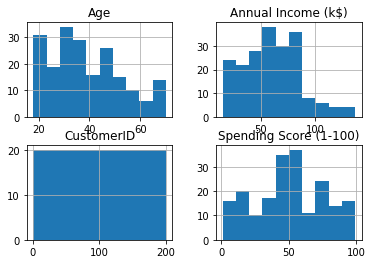

In [2859]:
df.hist()

**NOTE** : Since the 'Gender' column is not an integer value, the histogram is not created for it when we try to run the command df.hist().

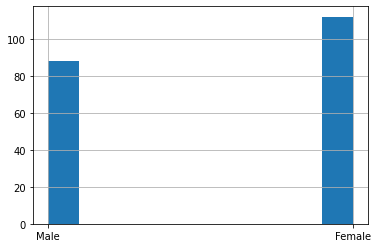

In [2860]:
# Plotting the histogram just for the 'Gender' column

df['Gender'].hist()

**NOTE** : One can see that the number of females is greater than the number of males.

In [2861]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**NOTE** : The above command shows the exact distribution of the male and the female population in the dataset. 

One can see that the number of females in the dataset = 112 and the number of males in the dataset = 88.

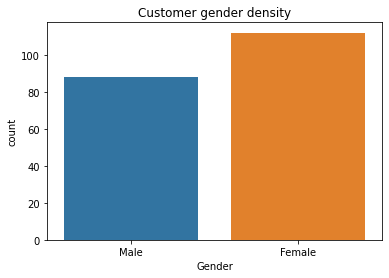

In [2862]:
# Groupby Gender visualization

sns.countplot(x='Gender', data=df)
plt.title('Customer gender density')
plt.show()

Just a gender density plot for proper visualization purposes.

###**DATA** **PREPROCESSING**

**NOTE** : As one can observe from the names of the individual columns, columns such as 'Annual Income (k$)' and 'Spending Score (1-100)' have spaces in their names which can create problems further computations hence replacing their names with 'Annual_Income' and 'Spending_Score' is extremely important.

In [2863]:
# Renaming the column names
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [2864]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

**NOTE** : Hence the columns have been renamed from 'Annual Income (k$)' to 'Annual_Income' and 'Spending Score (1-100)' to 'Spending_Score'.

####K means Clustering algorithm has key assumptions about the data:

####1. Data is not skewed
####2. Features have the same mean
####3. Features have the same variance

####Hence analysing the dataset for the same.

In [2865]:
df.describe()

CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000

In [2866]:
df.corr()

CustomerID       Age  Annual_Income  Spending_Score
CustomerID        1.000000 -0.026763       0.977548        0.013835
Age              -0.026763  1.000000      -0.012398       -0.327227
Annual_Income     0.977548 -0.012398       1.000000        0.009903
Spending_Score    0.013835 -0.327227       0.009903        1.000000

**NOTE** : We will only consider "**Annual_Income**" and "**Spending_Score**" columns for further processing for the ease of calculation, data processing and **visualization**.

In [2867]:
df['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

In [2868]:
df['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

**NOTE** : One can observe from the above description of the two attributes that is "Annual_Income" and "Spending_Score" that the mean value of both the attributes is different and hence needs to be Standardized in order to successfully complete the prerequisites of the K-means algorithm.

###**Are** **the** **data** **dimensions** **skewed**?

What do you mean by skweness of data?

**Skewness** refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution.

**Positive** **Skewness** : Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

**Negative** **Skewness** :  Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

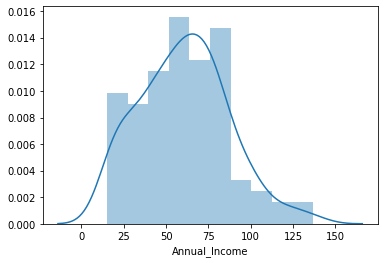

In [2869]:
sns.distplot(df['Annual_Income'])

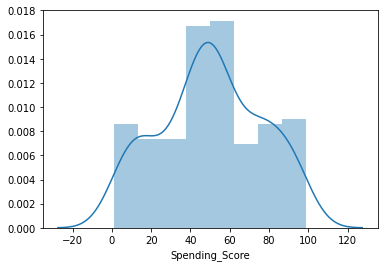

In [2870]:
sns.distplot(df['Spending_Score'])

**NOTE** : Looks like the data is not too bad over the two attributes. The data is not severely skewed over the two attributes hence there is no need to apply log transformation in order to handle the skewness of the data. One can check the performance of K-means with the same data.

In [2871]:
# Checking for null values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

**NOTE** : As such there are no null values in the dataset hence there is no requirement of handling them.

In [2872]:
df['Gender'].values

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female',


**NOTE** : Since the 'Gender' column of the dataset is a categorical column, one can replace those values with proper numerical values for the different categories present in the attribute, such as 'Male' can be replaced with '1' while 'Female' can be replaced by '2'.

Also this conversion will make it easier to scale all the attributes over the dataset using the StandardScaler method of the scikit learn library as it takes only one type of data inputs and since there are two types of inputs present in the dataset i.e. numerical and string type hence one of the datatype needs to be changed.

In [2873]:
# replacing the gender column values with numerical type values
df['Gender'] = df['Gender'].replace(["Male","Female"],["1","2"])

In [2874]:
df['Gender'].values

array(['1', '1', '2', '2', '2', '2', '2', '2', '1', '2', '1', '2', '2',
       '2', '1', '1', '2', '1', '1', '2', '1', '1', '2', '1', '2', '1',
       '2', '1', '2', '2', '1', '2', '1', '1', '2', '2', '2', '2', '2',
       '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1',
       '2', '1', '2', '1', '2', '1', '2', '1', '1', '1', '2', '2', '1',
       '1', '2', '2', '1', '2', '1', '2', '2', '2', '1', '1', '2', '1',
       '2', '2', '1', '1', '1', '2', '2', '1', '2', '2', '2', '2', '2',
       '1', '1', '2', '2', '1', '2', '2', '1', '1', '2', '2', '1', '1',
       '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '2', '2',
       '2', '2', '2', '1', '2', '2', '1', '2', '2', '1', '1', '1', '1',
       '1', '1', '2', '2', '1', '2', '2', '1', '1', '2', '2', '1', '2',
       '2', '1', '1', '1', '2', '2', '1', '1', '1', '2', '2', '2', '2',
       '1', '2', '1', '2', '2', '2', '1', '2', '1', '2', '1', '2', '2',
       '1', '1', '1', '1', '1', '2', '2', '1', '1', '1', '1', '2

**NOTE** : Looks like the values have been replaced.

In [2875]:
df.head(20)

CustomerID Gender  Age  Annual_Income  Spending_Score
0            1      1   19             15              39
1            2      1   21             15              81
2            3      2   20             16               6
3            4      2   23             16              77
4            5      2   31             17              40
5            6      2   22             17              76
6            7      2   35             18               6
7            8      2   23             18              94
8            9      1   64             19               3
9           10      2   30             19              72
10          11      1   67             19              14
11          12      2   35             19              99
12          13      2   58             20              15
13          14      2   24             20              77
14          15      1   37             20              13
15          16      1   22             20              79
16          17      2   35             21              35
17          18      1   20             21              66
18          19      1   52             23              29
19          20      2   35             23              98

**StandardScaler** **method** **in** **order** **to** **have** **the** **same** **mean** **and** **variance** **for** **all** **the** **attributes** **as** **the** **dataframe** **is** **the** **same** **all** **over**.

**I** **will** **be** **applying** **the** **StandardScaler** **method** **in** **order** **to** **scale** **all** **the** **attributes** **of** **the** **dataset** **evenly** **so** **that** **they** **have** **equal** **mean** **and** **variance** **for** **the** **successful** **satisfaction** **of** **K**-**means** **prerequisites**.

In [2876]:
scaler = StandardScaler()
scaler.fit(df)
df1 = pd.DataFrame(scaler.transform(df))
df1.columns = df.columns
df1.describe()

CustomerID        Gender           Age  Annual_Income  Spending_Score
count  2.000000e+02  2.000000e+02  2.000000e+02   2.000000e+02    2.000000e+02
mean  -6.661338e-18 -8.437695e-17 -9.603429e-17  -6.128431e-16   -1.121325e-16
std    1.002509e+00  1.002509e+00  1.002509e+00   1.002509e+00    1.002509e+00
min   -1.723412e+00 -1.128152e+00 -1.496335e+00  -1.738999e+00   -1.910021e+00
25%   -8.617060e-01 -1.128152e+00 -7.248436e-01  -7.275093e-01   -5.997931e-01
50%    0.000000e+00  8.864053e-01 -2.045351e-01   3.587926e-02   -7.764312e-03
75%    8.617060e-01  8.864053e-01  7.284319e-01   6.656748e-01    8.851316e-01
max    1.723412e+00  8.864053e-01  2.235532e+00   2.917671e+00    1.894492e+00

#### **Applying** **binning** **for** **better** **visualizations** **and** **in** **order** **to** **reduce** **the** **effect** **of** **minor** **observation** **errors**.

Currently assigning 5 bins in total.

In [2877]:
df1['Annual_Income'] = pd.qcut(df1['Annual_Income'], 5)

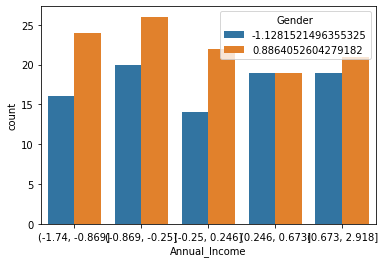

In [2878]:
sns.countplot(x='Annual_Income', hue='Gender', data=df1)

In [2879]:
df1['Spending_Score'] = pd.qcut(df1['Spending_Score'], 5)

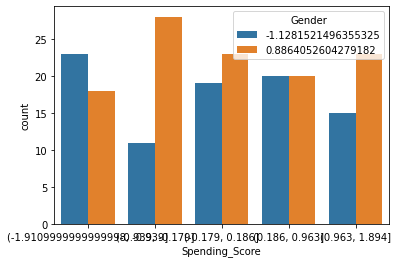

In [2880]:
sns.countplot(x='Spending_Score', hue='Gender', data=df1)

### **MODEL** **BUILDING**

Considering only **Annual_Income** and **Spending_Score** as the data in order to get better visualizations, we will define our matrix in the following manner.

In [2881]:
X = df.iloc[:,[3,4]].values

**NOTE** : Since the 'Annual_income' and 'Spending_score' lie on the 3rd and the 4th index position in the dataset, I have inputted 3 and 4 as the positions in the iloc function as the total number of columns in the dataset is equal to 5 and the index values starts from '0' in pandas.

In [2882]:
X.shape

(200, 2)

**NOTE** : The matrix is of shape 200X2 where there are 200 rows and 2 columns.

In [2883]:
m=X.shape[0] #Number of records
n=X.shape[1] #Number of features

To implement k means algorithm from scratch using python as a set of functions

In [2884]:
import numpy as np
import random as rd

class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K): # This function is used to handle random initialization
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss




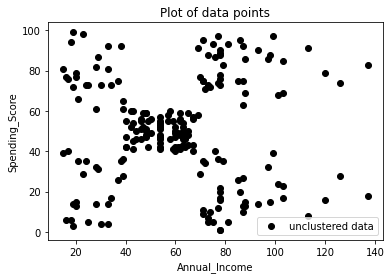

In [2885]:
# Plot of the unclustered data

plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [2886]:
n_iter = 100 # Setting the number of iterations as 100

In [2887]:
# Considering 5 clusters arbitarily

K=5

In [2888]:
kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

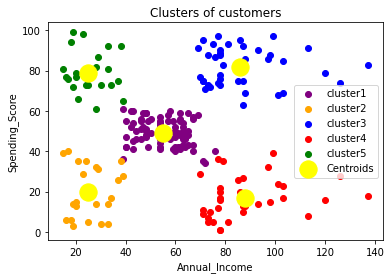

In [2889]:
color=['purple','orange','blue','red','green']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.legend()
plt.show()

**NOTE** : **Hence** **the** **data** **has** **become** **clustered** **now**, also one can see that there was not much effect on the clusters 

**The** **inference** **from** **the** **above** **plot** **of** **clustering** **is** **as** **follows** :

The customers can be segmented in the following manner :

1. Cluster '**green**' signifies the customers with low income but higher number of transactions hence more Spending score.

2. Cluster '**purple**' signifies the customers with medium income and medium Spending score i.e. the number of transactions made by the customers in this cluster are consistent with their Annual income.

3. Cluster '**red**' signifies the customers with high Annual Incomes but lower number of transactions hence for which even the Spending scores are low.

4. Cluster '**blue**' signifies the customers with maximum Annual Income and maximum number of transactions in general due to which the Spending Score of the customers is very high.

5. Cluster '**orange**' signifies customers with the least amount of annual income and least amount of spending score.

## **MODEL** **EVALUATION**

In order to find the optimum number of clusters (k).

The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called **WCSS** ( **Within**-**Cluster** **Sums** **of** **Squares**).

Steps involved in **ELBOW** **method** **are**:

- Perform K means clustering on different values of K ranging from 1 to any upper limit. 

- Here we are taking the upper limit as 10.

- For each K, calculate WCSS.

- Plot the value for WCSS with the number of clusters K.

- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesnâ€™t decrease more rapidly is the appropriate value of K.




In [2890]:
#to find optimum number of clusters using elbow method
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
    WCSS_array=np.append(WCSS_array,wcss)

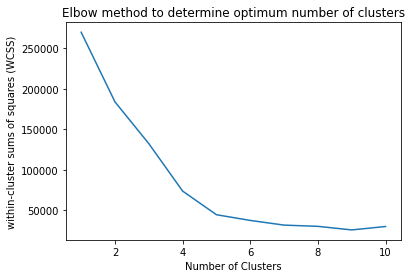

In [2891]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

**NOTE** : Hence according to the evaluation, the optimum number of clusters is actually equal to 5 as the "elbow" of the curve lies between 4 and 6 and at the exact location of 5 clusters. Hence the clustered data that we got above is the best solution for this dataset.

**CONCLUSION** : Hence from the above implementation of k Means clustering from scratch we achieved customer segmentation on the basis of their annual income and spending score/the number of transactions they have made. 

Clustering basically helped to segregate the customers into 5 different groups having different ranges of annual income and spending scores.

All the clusters were beautifully color coded in order to make it easy for the user of this notebook to distinguish between different clusters and their respective features.

K-means clustering was achieved completely as a set of functions written in Python programming language.

**CONTRIBUTION** :

Code by self ---- 50%

Code referred ----- 50%

**CITATIONS** :

https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25- Towards DataScience article to understand K means algorithm and implementation

https://www.kaggle.com/shwetabh123/mall-customers - Kaggle, to download the dataset "Malls_customer"





**LICENSE**

Copyright 2019 Ria Rajput

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.